<img src="Images/logo.jpg" width="600">

## <center> <span style="color:darkred"> Exercitation_06 </span> </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In this exercise we compute a Ising 1D model for a system of $N$ spin (with values 1 or -1). Here, I imposed periodic boundary conditions $s_{N+1} = s_{1}$ and the constants $\mu_B=1$ and $k_B=1$. 

This model (in one dimension) has been solved analitically. In this simulations, I sampled the Boltzmann statistical weight $p(\{ s_i \}) = \exp(-\beta H)/Z$, where $Z$ is the partition function, with two algorithms: **Metropolis** and **Gibbs**.

In the simulations, we had to evalue:   

   - Internal energy: $U(N,T) = \langle H \rangle_{h=0}$  
   - Heat Capacity: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$  
   - Magnetic Susceptibility: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$  
   - Magnetization: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$ 
    
in a temperature $T$ interval of $[0.5, 2]$.


The program can perform Metropolis or Gibbs simulation, via a specific parameter in the input file `input.dat`. 

At the beginning, I tried a test at a fixed temperature $ T=2$ K to see how the algorithms I wrote for Metropolis and Gibbs work, and to have an idea of the values of the observables. I used $10^5$ steps and $100$ blocks.

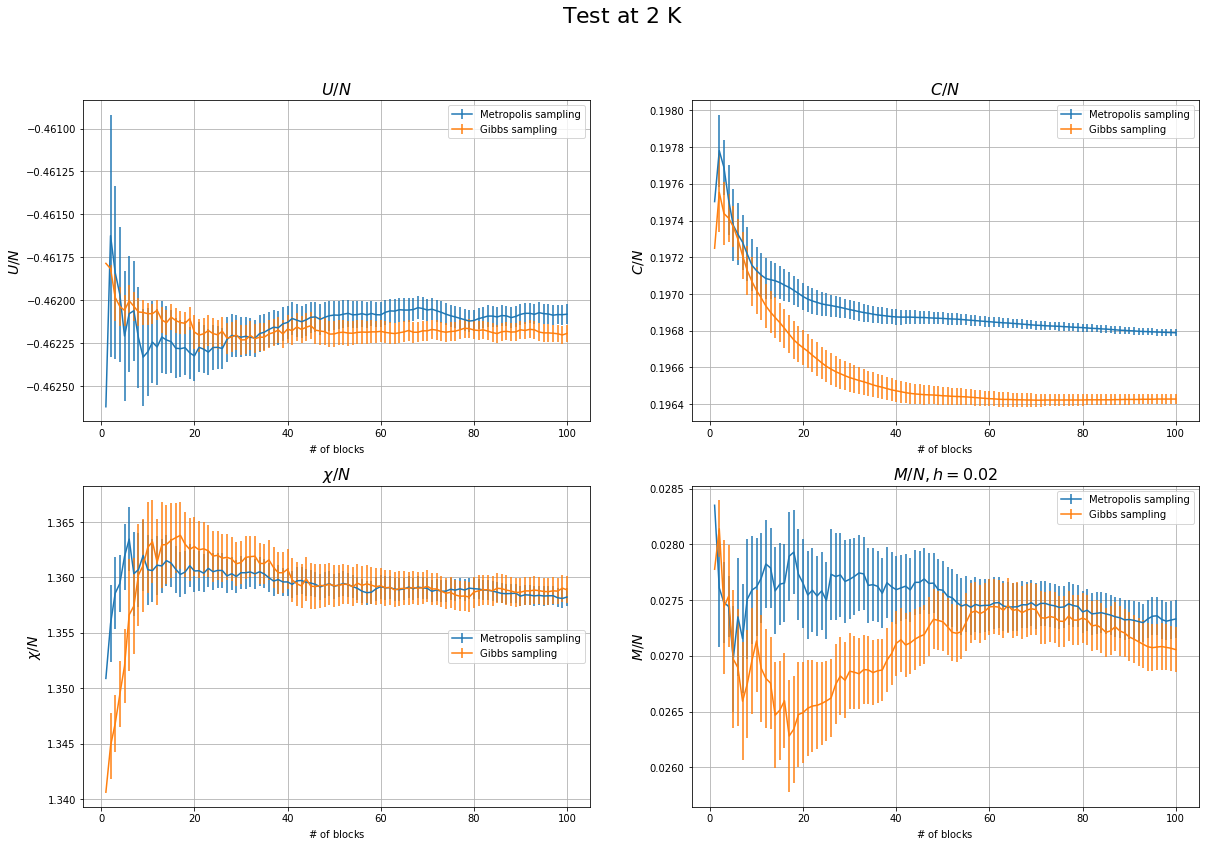

In [3]:
plt.figure(figsize=(20,13))
plt.suptitle('Test at $2~\mathrm{K}$', fontsize = 22)

plt.subplot(221)
plt.title('$U/N$', fontsize = 16)
dataUm= ascii.read('P1/Test2K/ene_ave.met', format='no_header')
xUm = dataUm['col1'] 
rUm = dataUm['col3'] #vector with mean
err_rUm = dataUm['col4'] #vector with uncertainties
dataUg= ascii.read('P1/Test2K/ene_ave.gib', format='no_header')
xUg = dataUg['col1'] 
rUg = dataUg['col3'] #vector with mean
err_rUg = dataUg['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(xUm, rUm, err_rUm , label= 'Metropolis sampling' )
plt.errorbar(xUg, rUg, err_rUg , label= 'Gibbs sampling' )
plt.xlabel('$\#$ of blocks')
plt.ylabel('$U/N$', fontsize= 14)
plt.legend()

plt.subplot(222)
plt.title('$C/N$', fontsize = 16)
dataCm= ascii.read('P1/Test2K/heat_ave.met', format='no_header')
xCm = dataCm['col1'] 
rCm = dataCm['col3'] #vector with mean
err_rCm = dataCm['col4'] #vector with uncertainties
dataCg= ascii.read('P1/Test2K/heat_ave.gib', format='no_header')
xCg = dataCg['col1'] 
rCg = dataCg['col3'] #vector with mean
err_rCg = dataCg['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(xCm, rCm, err_rCm , label= 'Metropolis sampling' )
plt.errorbar(xCg, rCg, err_rCg , label= 'Gibbs sampling' )
plt.xlabel('$\#$ of blocks')
plt.ylabel('$C/N$', fontsize= 14)
plt.legend()

plt.subplot(223)
plt.title('$\chi/N$', fontsize = 16)
dataXm= ascii.read('P1/Test2K/chi_ave.met', format='no_header')
xXm =dataXm['col1'] 
rXm = dataXm['col3'] #vector with mean
err_rXm = dataXm['col4'] #vector with uncertainties
dataXg= ascii.read('P1/Test2K/chi_ave.gib', format='no_header')
xXg = dataXg['col1'] 
rXg = dataXg['col3'] #vector with mean
err_rXg = dataXg['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(xXm, rXm, err_rXm , label= 'Metropolis sampling' )
plt.errorbar(xXg, rXg, err_rXg , label= 'Gibbs sampling' )
plt.xlabel('$\#$ of blocks')
plt.ylabel('$\chi/N$', fontsize= 14)
plt.legend(loc = 5)

plt.subplot(224)
plt.title('$M/N, h=0.02$', fontsize = 16)
dataMm= ascii.read('P1/Test2K/mag_ave002.met', format='no_header')
xMm =dataMm['col1'] 
rMm = dataMm['col3'] #vector with mean
err_rMm = dataMm['col4'] #vector with uncertainties
dataMg= ascii.read('P1/Test2K/mag_ave002.gib', format='no_header')
xMg = dataMg['col1'] 
rMg = dataMg['col3'] #vector with mean
err_rMg = dataMg['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(xMm, rMm, err_rMm , label= 'Metropolis sampling' )
plt.errorbar(xMg, rMg, err_rMg , label= 'Gibbs sampling' )
plt.xlabel('$\#$ of blocks')
plt.ylabel('$M/N$', fontsize= 14)
plt.legend(loc = 1)

plt.show()

After that, I added the equilibration process (it is clear it is necessary seeing the behaviour in the first steps) and I modify the input files. The temperature parameter is replaced by three parameters with the extremes of the interval and the temperature step. 

In my simulation, I used $T \in [0.5,2]$ with a step $\mathrm{d}T=0.05$. I made $5 \times 10^4$ steps of equilibration before each simulation, and then $10^5$ steps in $100$ blocks. I used $h=0$ and evaluated the internal energy, heat capacity and suscebtibility, and then restart the simulation with $h=0.02$ and I have evaluated the magnetization.   
Here I compare my average results of the four observables with the analytic solution, which is calculated in the following mirror. 

In [4]:
# Expected functions
points = 100
T = np.linspace(0.4,2.1, num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

# Internal energy (per particle)
e = -J*( th + ch*thN )/( 1 + thN )

# Heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Magnetization (h=0.02)
h=0.02 # external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# Susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

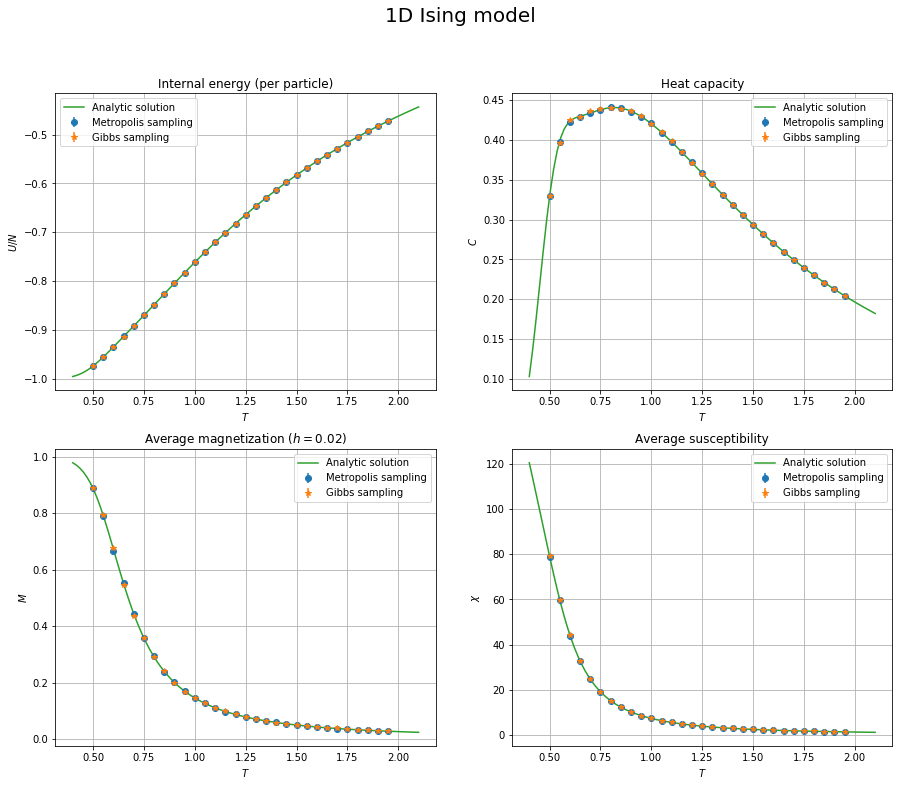

In [5]:
plt.figure(figsize=(15,12))

plt.suptitle('1D Ising model',fontsize=20)

plt.subplot(221)
plt.title('Internal energy (per particle)')
bl, E, errE = np.loadtxt("P1/Risultati/ene.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, Eg, errEg = np.loadtxt("P1/Risultati/ene.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, E ,yerr=errE, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, Eg ,yerr=errEg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, e, label = 'Analytic solution')
plt.xlabel('$T$')
plt.ylabel('$U/N$')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.title('Heat capacity')
bl, h, errh = np.loadtxt("P1/Risultati/heat.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, hg, errhg = np.loadtxt("P1/Risultati/heat.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, h ,yerr=errh, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, hg ,yerr=errhg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, heat, label = 'Analytic solution')
plt.xlabel('$T$')
plt.ylabel('$C$')
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.title('Average magnetization ($h=0.02$)')
bl, m, errm = np.loadtxt("P1/Risultati/mag.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, mg, errmg = np.loadtxt("P1/Risultati/mag.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, m ,yerr=errm, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, mg ,yerr=errmg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, M, label = 'Analytic solution')
plt.xlabel('$T$')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)

plt.subplot(224)
plt.title('Average susceptibility')
bl, x, errx = np.loadtxt("P1/Risultati/chi.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, xg, errxg = np.loadtxt("P1/Risultati/chi.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, x ,yerr=errx, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, xg ,yerr=errxg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, X, label = 'Analytic solution')
plt.xlabel('$T$')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)

plt.show()

The results of the simulation are in agreement with the analytic result. 